# Bellabeat Case Study
###### Sri Bagus N
###### 15 August 2021

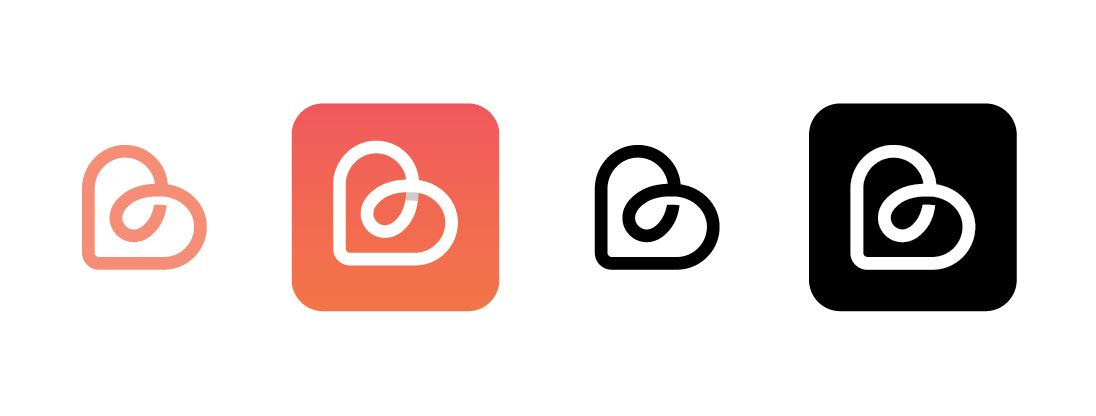 

*Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat have the potential to become a larger player in the global smart device market, and the stakeholders believes that analyzing smart
device usage data could help the company grow.*

# Ask

#### 1. Business Task
Analyze smart device usage from public data to analyze to understand how consumers use smart devices. The insight gained from analyzing this data will be used to make recommendation for Bellabeat products to grow the business

#### 2. Key Stakeholders
* **Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer
* **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* **Bellabeat marketing analytics team**: A team of data analysts to help guide Bellabeat’s marketing strategy

# Prepare

#### 1. ROCCC
* **Reliable**: This datasets are provided by FitBit, a well known American electronics fitness company. It can be assumed this datasets is reliable enough.
* **Original**: Original data source >> https://zenodo.org/record/53894#.X9oeh3Uzaao
* **Comprehensive**: 18 csv files related to: sleep, daily steps, heart rate, calories, etc.
* **Current**: This datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03/12/2016 - 05/12/2016.
* **Cited**: Many of citation on Kaggle

#### 2. Importing Libraries

In [1]:
install.packages("tidyverse"); install.packages("skimr"); 
install.packages("janitor"); install.packages("dplyr"); 
install.packages("tidyr"); install.packages("ggplot2")

library(tidyverse); library(ggplot2);
library(skimr); library(janitor)
library(dplyr); library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching 

#### 3. Importing Datasets
Focusing only on daily datasets for simplicity. Daily calories, daily intensities, and daily steps are not imported for those features are included in daily activity dataset.

In [2]:
activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
heartrate <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
sleep <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  Time = col_character(),
  Value = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  SleepDay = col_character(),
  TotalSleepRecords = col_double(),
  TotalMinutesAsleep = col_double(),
  Total

In [3]:
## check datasets

head(activity); skim(activity)

head(heartrate); skim(heartrate)

head(sleep); skim(sleep)

head(weight); skim(weight)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


── Data Summary ────────────────────────
                           Values  
Name                       activity
Number of rows             940     
Number of columns          15      
_______________________            
Column type frequency:             
  character                1       
  numeric                  14      
________________________           
Group variables            None    

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityDate          0             1     8     9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps                       0             1 7.64e+3 5.09e+3          0
 3 TotalDistance                    0     

Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


── Data Summary ────────────────────────
                           Values   
Name                       heartrate
Number of rows             2483658  
Number of columns          3        
_______________________             
Column type frequency:              
  character                1        
  numeric                  2        
________________________            
Group variables            None     

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 Time                  0             1    19    21     0   961274          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate         mean           sd         p0
1 Id                    0             1 5513764629.  1950223761.  2022484408
2 Value                 0             1         77.3         19.4         36
         p25        p50        p75    

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


── Data Summary ────────────────────────
                           Values
Name                       sleep 
Number of rows             413   
Number of columns          5     
_______________________          
Column type frequency:           
  character                1     
  numeric                  4     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 SleepDay              0             1    20    21     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate          mean      sd         p0
1 Id                         0             1 5000979403.   2.06e+9 1503960366
2 TotalSleepRecords          0             1          1.12 3.46e-1          1
3 TotalMinutesAsleep         0             1        419.   1.18e+

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


── Data Summary ────────────────────────
                           Values
Name                       weight
Number of rows             67    
Number of columns          8     
_______________________          
Column type frequency:           
  character                1     
  logical                  1     
  numeric                  6     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 Date                  0             1    19    21     0       56          0

── Variable type: logical ──────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate  mean count           
1 IsManualReport         0             1 0.612 TRU: 41, FAL: 26

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate    mean        

# Process

There are a lot of missing values from the fat col on weight dataset with complete_rate of only 0.0299, this feature can be considered useless. This feature will be dropped along with other non essential features later. Another issue is that each dataset has different colname for indicating date and time and the values are in chr format. These colnames and values need to be matched for consistency.

In [4]:
## renaming date and time cols
## lowering colnames for ez refference
## converting dates to date format
## ensuring colnames uniqe and consistent

activity <- activity %>% rename(date = ActivityDate) %>% rename_with(tolower) %>% 
    mutate(date = as.Date(date, format = "%m/%d/%y")) %>% clean_names()

heartrate <- heartrate %>% rename(date = Time) %>% rename_with(tolower) %>% 
    mutate(date = as.Date(date, format = "%m/%d/%y")) %>% clean_names()

sleep <- sleep %>% rename(date = SleepDay) %>% rename_with(tolower) %>% 
    mutate(date = as.Date(date, format = "%m/%d/%y")) %>% clean_names()

weight <- weight %>% rename_with(tolower) %>% 
    mutate(date = as.Date(date, format = "%m/%d/%y")) %>% clean_names()

In [5]:
## check datasets

head(activity); head(heartrate)
head(sleep); head(weight)

id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2020-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2020-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2020-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2020-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2020-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2020-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,date,value
<dbl>,<date>,<dbl>
2022484408,2020-04-12,97
2022484408,2020-04-12,102
2022484408,2020-04-12,105
2022484408,2020-04-12,103
2022484408,2020-04-12,101
2022484408,2020-04-12,95


id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2020-04-12,1,327,346
1503960366,2020-04-13,2,384,407
1503960366,2020-04-15,1,412,442
1503960366,2020-04-16,2,340,367
1503960366,2020-04-17,1,700,712
1503960366,2020-04-19,1,304,320


id,date,weightkg,weightpounds,fat,bmi,ismanualreport,logid
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,2020-05-02,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,2020-05-03,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,2020-04-13,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,2020-04-21,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,2020-05-12,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,2020-04-17,72.4,159.6147,25,27.45,TRUE,1.460938e+12


By now, the datasets are clean enough and consistent. The next step is to pick essential features from each datasets and put them into one dataframe, this will make analyzing step easier. Features that aren't considered to be essential:
* trackerdistance
* loggedactivitiesdistance
* fat
* weightpounds
* ismanualreport
* logid

Those features would be canceled out in the merging process

In [6]:
## merging datasets and dropping some features
data <- merge(as <- merge(activity, sleep, c("id","date")), hw <- merge(heartrate, weight, c("id","date")), c("id","date")) %>%
        select(-c(trackerdistance, loggedactivitiesdistance, fat, weightpounds, ismanualreport, logid))

## define dataframe with only activity and sleep merged as "as"
## define dataframe with only heartrate and weight merged as "hw"

In [7]:
## additional
data <- data %>% rename(heartbeat = value) # rename heartrate value

In [8]:
## check uniqe values of id and date
n_distinct(data$id)
n_distinct(data$date)

[1] 3

[1] 30

Due to the inner join of the datasets, there are only 3 users remaining with 30 days record

In [9]:
## check new dataset
skim(data); head(data)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             271590
Number of columns          19    
_______________________          
Column type frequency:           
  Date                     1     
  numeric                  18    
________________________         
Group variables            None  

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 date                  0             1 2020-04-12 2020-05-12 2020-04-27
  n_unique
1       30

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd
 1 id                               0             1 6.87e+9 4.07e+8
 2 totalsteps                       0             1 9.98e+3 3.93e+3
 3 totaldistance                    0             1 6.75e+0 2.71e+0
 4 veryactivedi

,id,date,totalsteps,totaldistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed,heartbeat,weightkg,bmi
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4558609924,2020-05-01,3428,2.27,0,0,2.27,0,0,0,190,1121,1692,1,115,129,57,69.9,27.32
2,4558609924,2020-05-01,3428,2.27,0,0,2.27,0,0,0,190,1121,1692,1,115,129,56,69.9,27.32
3,4558609924,2020-05-01,3428,2.27,0,0,2.27,0,0,0,190,1121,1692,1,115,129,59,69.9,27.32
4,4558609924,2020-05-01,3428,2.27,0,0,2.27,0,0,0,190,1121,1692,1,115,129,58,69.9,27.32
5,4558609924,2020-05-01,3428,2.27,0,0,2.27,0,0,0,190,1121,1692,1,115,129,58,69.9,27.32
6,4558609924,2020-05-01,3428,2.27,0,0,2.27,0,0,0,190,1121,1692,1,115,129,59,69.9,27.32


# Analyze

### 1. Total Steps vs Heart Rate

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



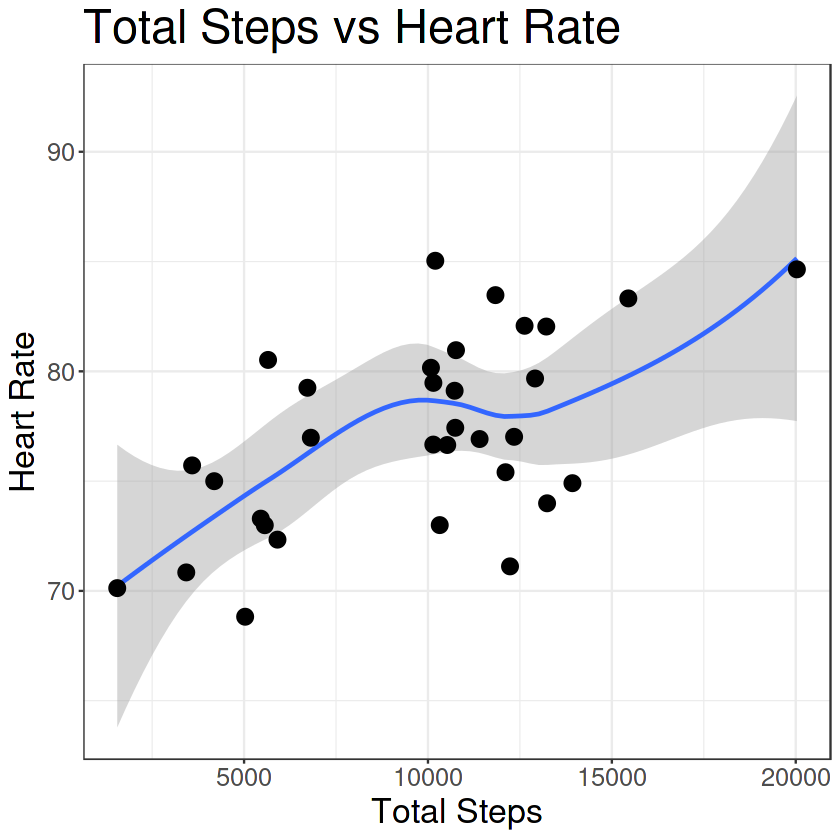

In [10]:
ggplot(
    data %>%
    group_by(id, date) %>%
    summarize(totalsteps = mean(totalsteps), heartbeat = mean(heartbeat)),
    aes(totalsteps, heartbeat)) + theme_bw() +
    labs(title = "Total Steps vs Heart Rate",
       y = "Heart Rate",
       x = "Total Steps")+
    theme(axis.text.x = element_text(size = 15), axis.text.y= element_text(size = 15), plot.title = element_text(size= 28), 
          axis.title=element_text(size= 20), legend.text=element_text(size=14), legend.title = element_text(size= 18))+
    geom_smooth()+
    geom_point(size = 4)

options(repr.plot.width = 12, repr.plot.height = 12)

The plot shows from the figure that total steps and heart rate doesnt have much correlation even though it still shows those variables move at the same direction, but widespreadly. However, the result of this plot is caused by the lack of samples due to the number of users that reduced to only 3 because of the merging. The heart rate dataframe is the bottleneck in this case, this insight could be a recommendation for the stakeholders to improve their product. It would be much better to make a conclution with more data from various users.

### 2. Total Steps vs Calories

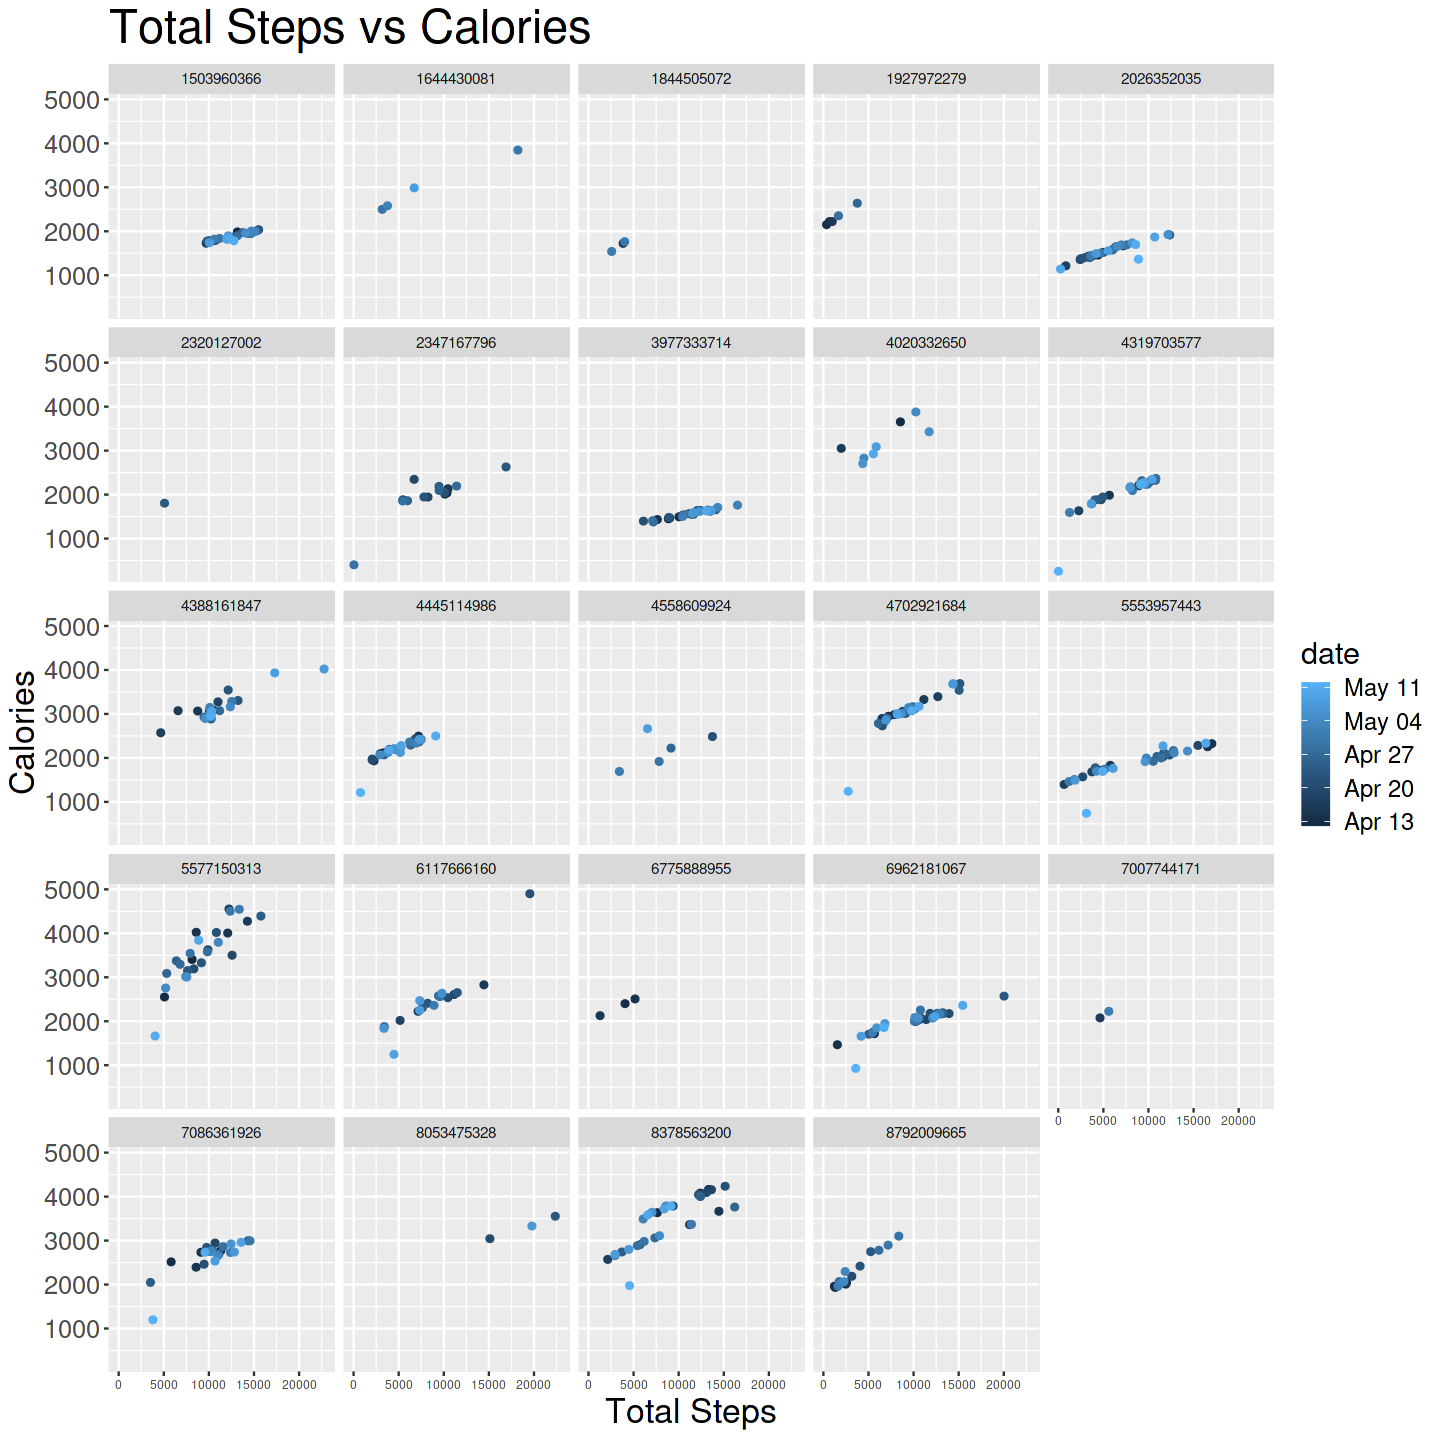

In [11]:
ggplot(as, aes(totalsteps, calories))+
    labs(title = "Total Steps vs Calories",
       y = "Calories",
       x = "Total Steps")+
    theme(axis.text.x = element_text(size = 7), axis.text.y= element_text(size = 15), plot.title = element_text(size= 28), 
          axis.title=element_text(size= 20), legend.text=element_text(size=14), legend.title = element_text(size= 18))+
    geom_point(aes(color=date))+
    facet_wrap(~id)
    
options(repr.plot.width = 12, repr.plot.height = 12)

Total steps and calories clearly shows a high correlation in this plot. The points are not widespread and they move along to the same direction. This plot shows that the more the users take steps, the more calories they burn. Another feature added to this plot is date data in color. With color as data indicator, we can see when a user is more likely to burn their calories by making steps. Some users consistently take steps even though they have burnt more calories previously, and some other users reduce their steps once they have reached some point of calories burnt. Bellabeat could use this information to remind their users on keeping good routine.

### 3. Activity Effect on Sleep Duration

In [12]:
# new dataframe of total minutes asleep and total minutes of activity per day
totalacts <- as %>% group_by(date, id) %>%
    summarize(totalminutesasleep = sum(totalminutesasleep), 
              totalactivityminutes = (mean(veryactiveminutes) + mean(fairlyactiveminutes) + 
              mean(lightlyactiveminutes) + mean(sedentaryminutes)))

highact <- max(totalacts$totalactivityminutes) # highest total activity in minutes
lowact <- 0 # lowest total activity in minutes

cat("Activity classification:\n",
           lowact,"\t\tbottom light activity\n",
           highact*33/100,"\tbottom moderate activity\n",
           highact*66/100,"\tbottom high activity\n",
           highact,"\t\thighest activity\n")

# mutating total activity classes
totalacts <- totalacts %>% 
       mutate(totalactivityclass = case_when
              (totalactivityminutes >= lowact & totalactivityminutes < highact*33/100 ~ "Light", 
               totalactivityminutes >= highact*33/100 & totalactivityminutes < highact*66/100 ~ "Moderate",
               TRUE ~ "High"))

head(totalacts)

`summarise()` has grouped output by 'date'. You can override using the `.groups` argument.



Activity classification:
 0 		bottom light activity
 461.34 	bottom moderate activity
 922.68 	bottom high activity
 1398 		highest activity


date,id,totalminutesasleep,totalactivityminutes,totalactivityclass
<date>,<dbl>,<dbl>,<dbl>,<chr>
2020-04-12,1503960366,327,1094,High
2020-04-12,1927972279,750,789,Moderate
2020-04-12,2026352035,503,898,Moderate
2020-04-12,3977333714,274,971,High
2020-04-12,4020332650,501,1062,High
2020-04-12,4445114986,429,983,High


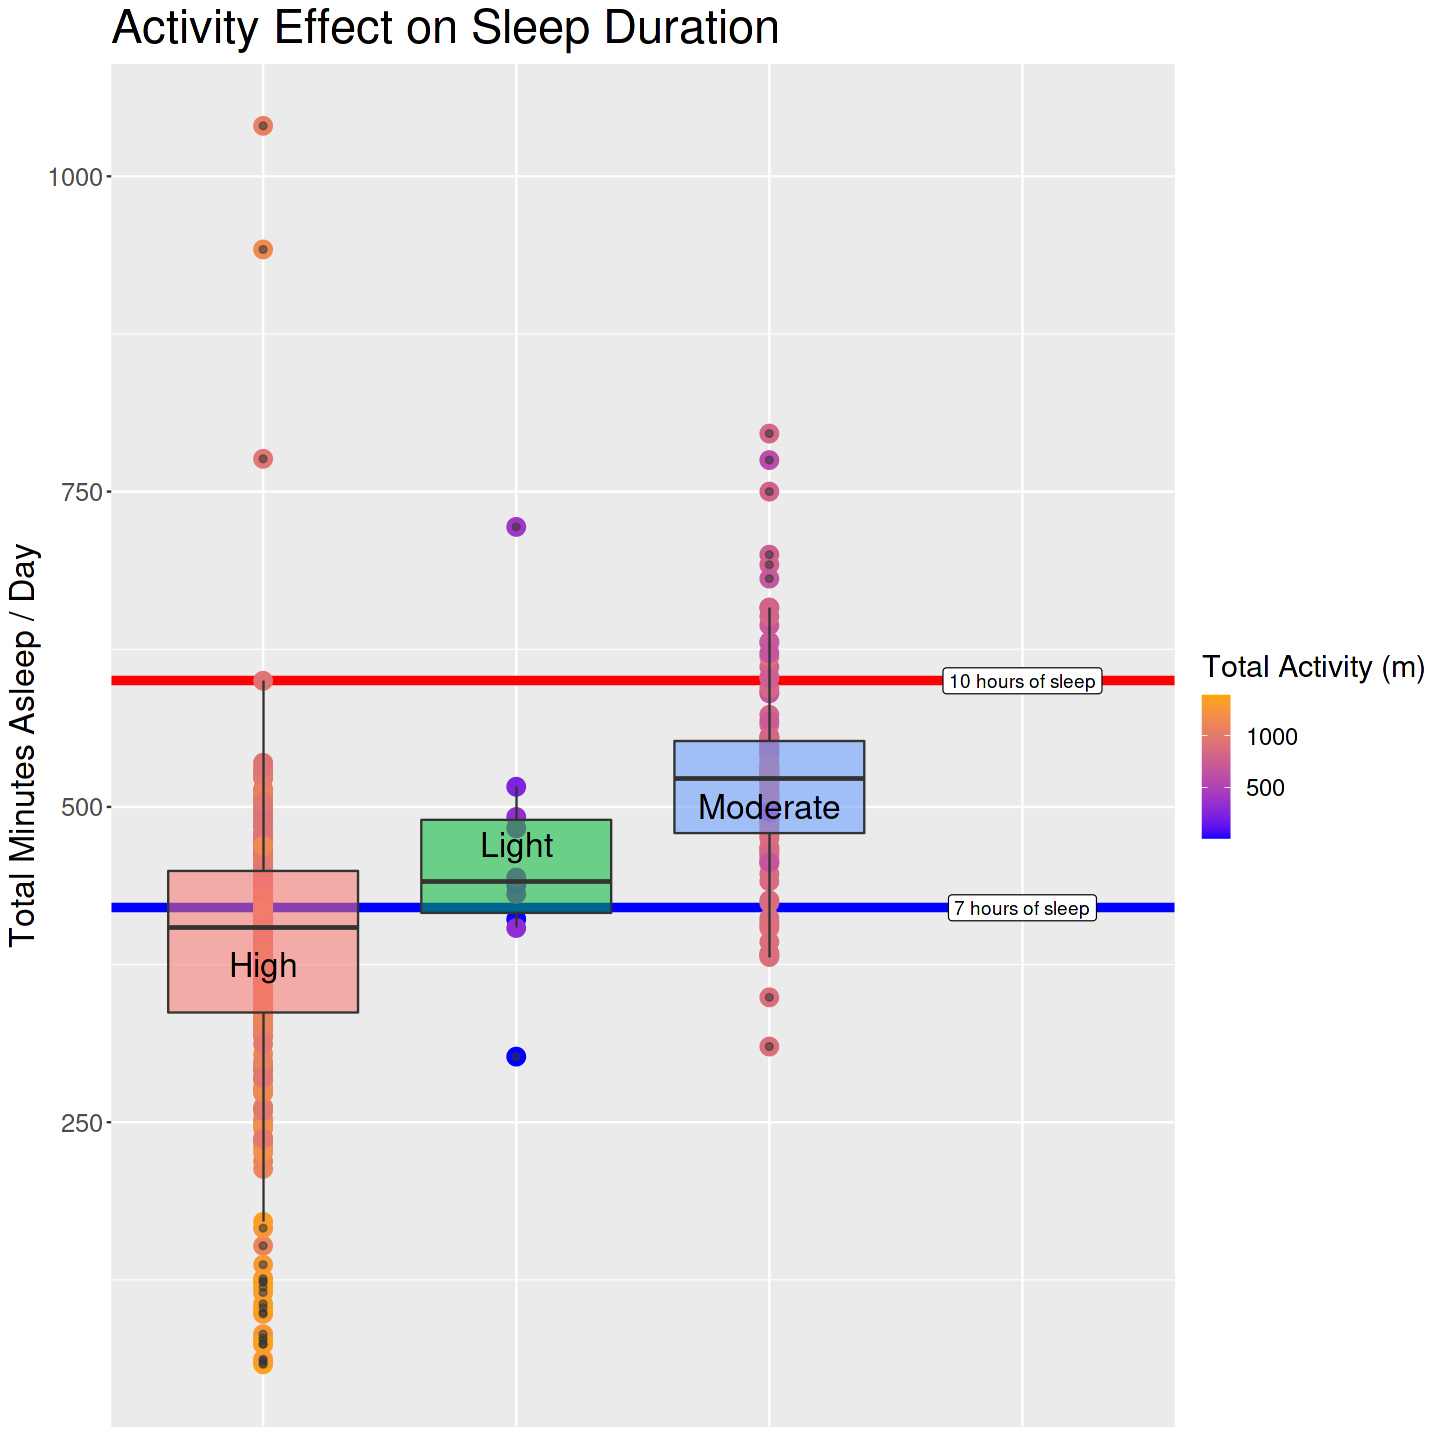

In [13]:
ggplot(totalacts, aes(totalactivityclass, totalminutesasleep))+
    labs(title = "Activity Effect on Sleep Duration",
       y = "Total Minutes Asleep / Day",
       x = "Activity")+
    theme(axis.text.x = element_blank(), axis.text.y = element_text(size = 15), plot.title = element_text(size = 28), 
          axis.title = element_text(size = 20), legend.text = element_text(size = 14), 
          legend.title = element_text(size = 18), axis.ticks.x = element_blank(), axis.title.x=element_blank())+
    geom_hline(yintercept = 420, color = "blue", size = 2) + geom_hline(yintercept = 600, color = "red", size = 2)+
    geom_point(aes(color = totalactivityminutes, size = 1))+
    scale_color_gradient(low = "blue", high = "orange")+
    geom_boxplot(aes(alpha = 1, fill = totalactivityclass))+
    annotate(geom = "label", x = "none", y = 420, label = "7 hours of sleep")+
    annotate(geom = "label", x = "none", y = 600, label = "10 hours of sleep")+
    annotate(geom = "text", x = "High", y = 375, label = "High", size = 7)+
    annotate(geom = "text", x = "Moderate", y = 500, label = "Moderate", size = 7)+
    annotate(geom = "text", x = "Light", y = 470, label = "Light", size = 7)+
    guides(fill = "none", size = "none", alpha = "none")+
    labs(color = "Total Activity (m)")

options(repr.plot.width = 12, repr.plot.height = 12)

According to [**US Centers for Disease Control and Prevention**](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html), the best sleep duration for teens are 8–10 hours/day and 7-9 hours/day for adults. The activity and sleep data shows the relation of sleep duration with activity intensity per day as plotted above. Bellabeat can use this data to determine whether their users are doing enough activity in a day to get the best sleep duration based on their age. This data also shows that intense activity is not always good for their sleep quality, this can be seen by the fact that a lot of users with high minutes of total activity fall below 250 minutes of sleep in a day.

### 4. Users Weight Status

In [14]:
# bmi classification
writeLines("BMI range and weight status:
            \nBelow 18.5\t\tUnderweight
            \n18.5 – 24.9\t\tNormal or Healthy Weight
            \n25.0 – 29.9\t\tOverweight
            \n30.0 and Above\t\tObese")

weight <- weight %>% # mutating bmi classes
    mutate(bmiclass = case_when
              (bmi < 18.5 ~ "Underweight",
               bmi >= 18.5 & bmi <= 24.9 ~ "Normal",
               bmi >= 25 & bmi <= 29.9 ~ "Overweight",
               TRUE ~ "Obese"))

usersbmi <- weight %>% # grouping by bmi class
    group_by(bmiclass) %>% 
    summarize(count = sum(n_distinct(id))) %>%
    mutate(percentage = (count/sum(count)),
           ymax = cumsum(percentage),
           ymin = ifelse(is.na(lag(ymax)), 0, lag(ymax)))

# Compute label position
usersbmi$labelPosition <- (usersbmi$ymax + usersbmi$ymin) / 2

# Compute a good label
usersbmi$label <- paste0(usersbmi$bmiclass, "\n user(s): ", usersbmi$count, 
                         "\n", round(usersbmi$percentage*100, digits = 2), "%")

usersbmi
cat("Users: ", n_distinct(weight$id))

BMI range and weight status:
            
Below 18.5		Underweight
            
18.5 – 24.9		Normal or Healthy Weight
            
25.0 – 29.9		Overweight
            
30.0 and Above		Obese


bmiclass,count,percentage,ymax,ymin,labelPosition,label
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Normal,3,0.375,0.375,0.000,0.1875,Normal user(s): 3 37.5%
Obese,1,0.125,0.500,0.375,0.4375,Obese user(s): 1 12.5%
Overweight,4,0.500,1.000,0.500,0.7500,Overweight user(s): 4 50%


Users:  8

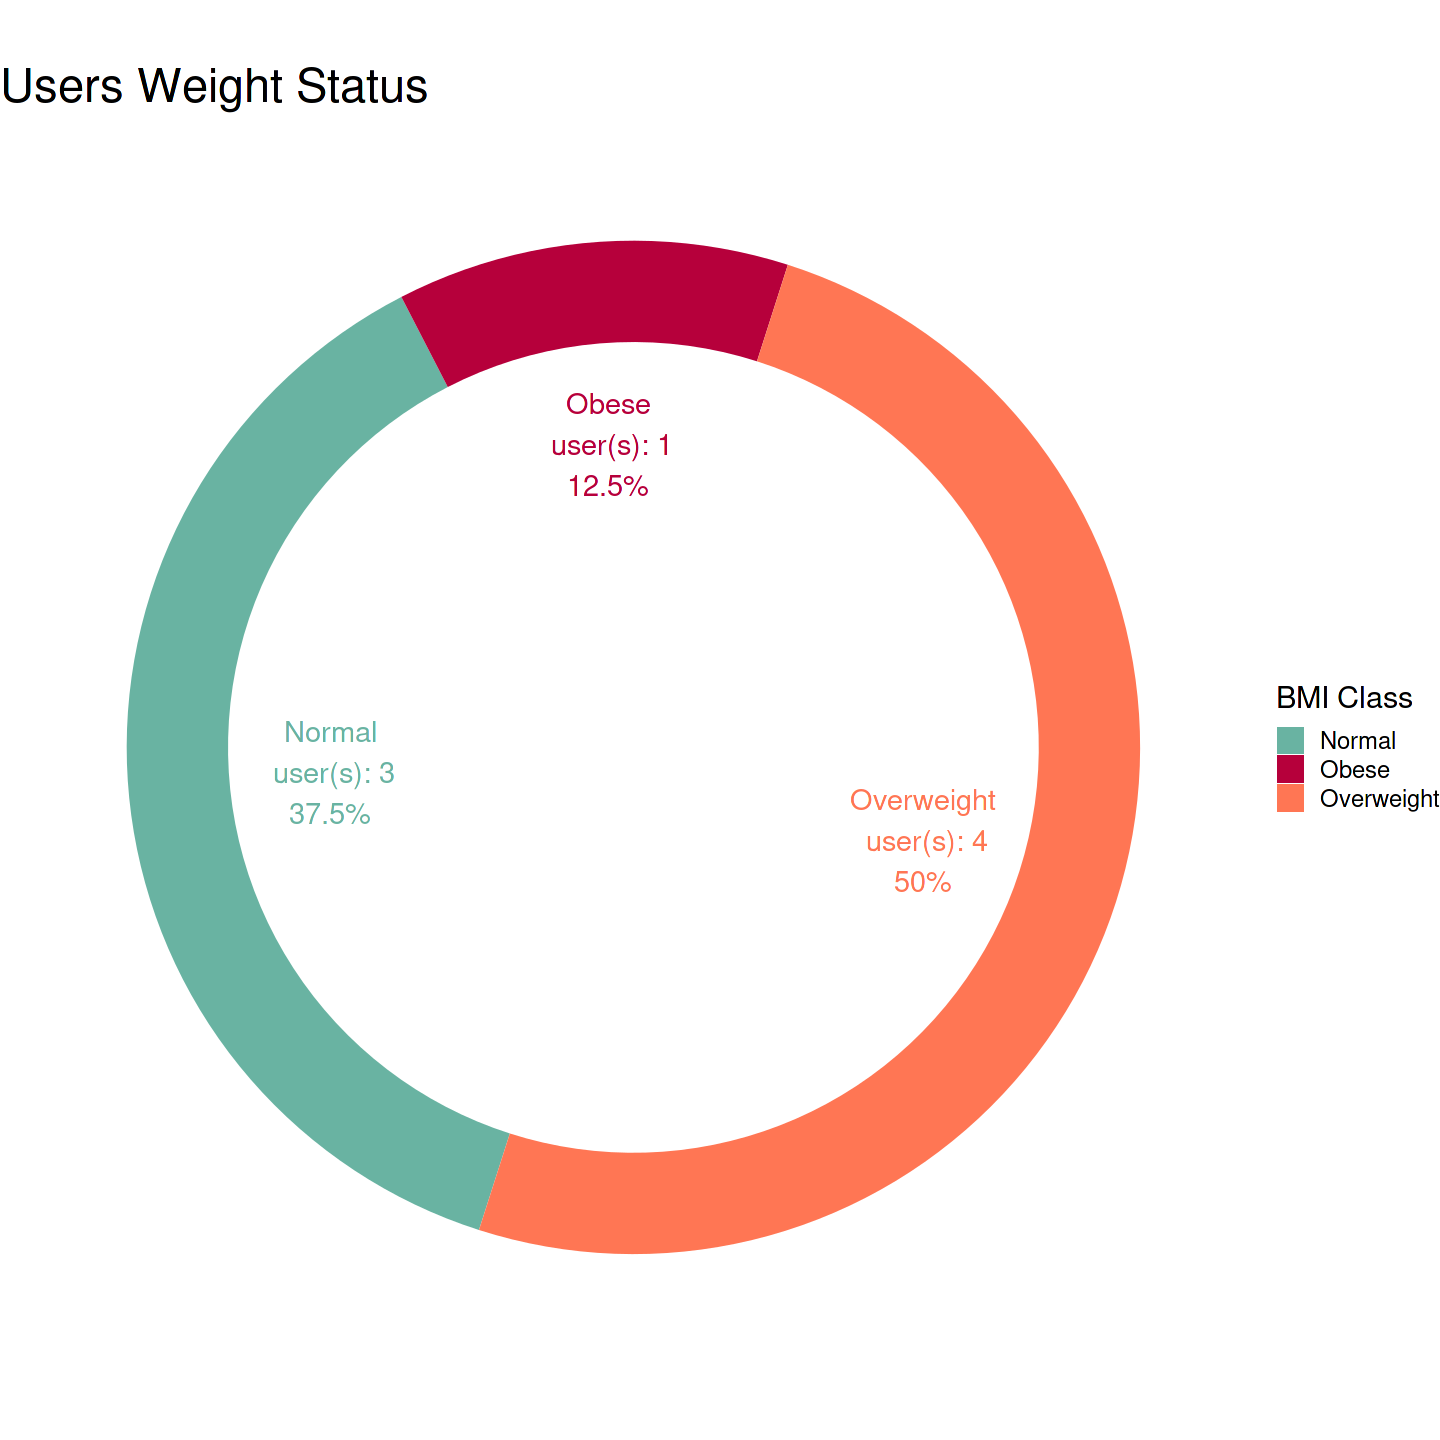

In [15]:
ggplot(usersbmi)+
    geom_rect(aes(ymax = ymax, ymin = ymin, xmax = 4, xmin = 3, fill = bmiclass)) + 
    geom_text(x=2, aes(y=labelPosition, label=label, color=bmiclass), size=6) +
    coord_polar("y", start = 60) + 
    theme_void() + 
    scale_fill_manual(values=c("#69b3a2", "#b6003b", "#ff7654")) +
    scale_color_manual(values=c("#69b3a2", "#b6003b", "#ff7654")) +
    theme(plot.title = element_text(size = 28), 
          legend.text = element_text(size = 14), 
          legend.title = element_text(size = 18)) + 
    labs(fill = "BMI Class") +
    guides(color = "none") +
    xlim(c(-1, 4)) + labs(title = "Users Weight Status")

options(repr.plot.width = 12, repr.plot.height = 12)

This doughnut chart shows us the percentage and how many of the users are at normal, overweight, or obese weight status. The classification used to visualize this data based on [**US Centers for Disease Control and Prevention**](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html) BMI interpretation. It is shown clearly that most of users (50%) are  overweight. Users with normal weight are the second majority, as they take 37.5% of the dataset. Meanwhile there is only one obese user that takes 12.5%. While this data might shows percentage of our customer's weight status, it is important to note that weight data only contains input from 8 users. Compared to activity data which has record of 33 users, whether weight data could be considered representative enough or not is questionable.

### 5. Weight vs Steps

In [16]:
# merging activity data with weight data
aw <- merge(activity, weight, c("id","date")) %>%
    select(c(id, date, totalsteps, weightkg, bmi, bmiclass))
head(aw)
cat("Users: ", n_distinct(aw$id))

,id,date,totalsteps,weightkg,bmi,bmiclass
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<chr>
1,1503960366,2020-05-02,14727,52.6,22.65,Normal
2,1503960366,2020-05-03,15103,52.6,22.65,Normal
3,1927972279,2020-04-13,356,133.5,47.54,Obese
4,2873212765,2020-04-21,8859,56.7,21.45,Normal
5,2873212765,2020-05-12,7566,57.3,21.69,Normal
6,4319703577,2020-04-17,29,72.4,27.45,Overweight


Users:  8

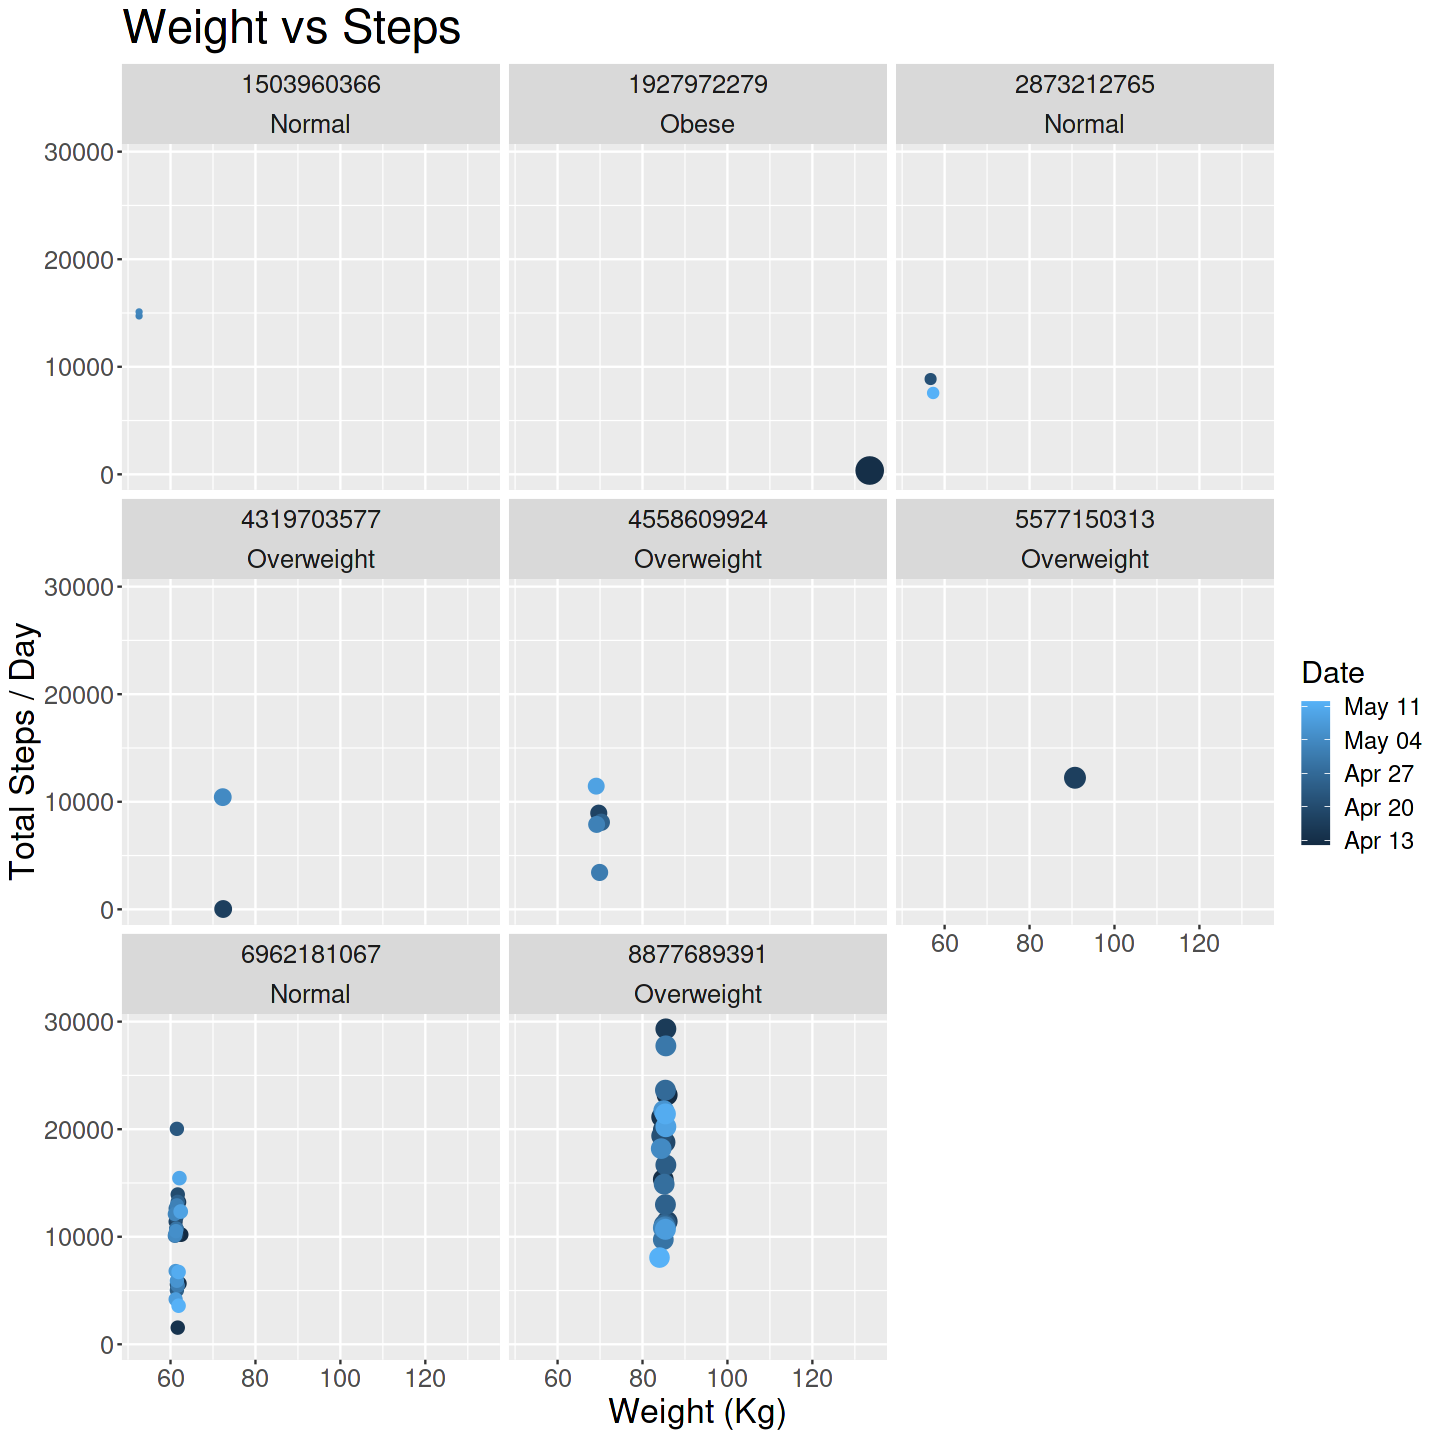

In [17]:
ggplot(aw, aes(weightkg, totalsteps))+
    labs(title = "Weight vs Steps",
       y = "Total Steps / Day",
       x = "Weight (Kg)")+
    theme(axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 15), plot.title = element_text(size = 28), 
          axis.title = element_text(size = 20), legend.text = element_text(size = 14), legend.title = element_text(size = 18),
          strip.text = element_text(size=15))+
    geom_point(aes(size = weightkg, color = date))+
    facet_wrap(~id + bmiclass)+
    guides(size = "none")+labs(color = "Date")+
    scale_size_continuous(range = c(1, 7))

Based on the Weight vs Steps plot of each user and their BMI class with date as color indicator, we can see who consistantly take steps and how much they weight chronologicaly. It looks like that there are only 2 of 8 users who consistantly take steps from April 13 to May 11 with various intensity each day, while the rest only provide 1 to 5 days of record. However, this could also be caused by the lack of weight recording by the rest of the users and not necessarily due to their lack of activity. So further data exploration was done by filtering activity data with only IDs from weight data.

In [18]:
ids <- c() # make vector to save unique IDs from weight data

for(i in distinct(aw, id)) {
    ids <- append(ids, i)
}

ids

[1] 1503960366 1927972279 2873212765 4319703577 4558609924 5577150313 6962181067
[8] 8877689391

In [19]:
weight_id_totalsteps <- select(activity, c("id", "date", "totalsteps")) %>%
    filter(id %in% ids) # filtering totalsteps data with only id in weight data

weight_id_totalsteps
cat("\nUsers: ", n_distinct(weight_id_totalsteps$id))

id,date,totalsteps
<dbl>,<date>,<dbl>
1503960366,2020-04-12,13162
1503960366,2020-04-13,10735
1503960366,2020-04-14,10460
1503960366,2020-04-15,9762
1503960366,2020-04-16,12669
1503960366,2020-04-17,9705
1503960366,2020-04-18,13019
1503960366,2020-04-19,15506
1503960366,2020-04-20,10544



Users:  8

Turns out those users actually did more steps!

The next step is to merge weight_id_totalsteps with weight data to plot the complete totalsteps vs weightkg data. In order to avoid data shrinkage due to lack of weight record, this time I did left join instead of inner join, and then I will replace missing weight values with the mean weight of that user.

In [20]:
mean_weightkg_bmi <- aw %>% # calculating mean weight of each user
    group_by(id) %>%
    summarize(weightkg = mean(weightkg, na.rm=TRUE),
              bmi = mean(bmi, na.rm=TRUE))

mean_weightkg_bmi

id,weightkg,bmi
<dbl>,<dbl>,<dbl>
1503960366,52.60000,22.65000
1927972279,133.50000,47.54000
2873212765,57.00000,21.57000
4319703577,72.35000,27.41500
4558609924,69.64000,27.21400
5577150313,90.70000,28.00000
6962181067,61.55333,24.02800
8877689391,85.14583,25.48708


In [21]:
aw <- merge(weight_id_totalsteps, weight, all.x = TRUE) %>% # merge by left join
    select(c(id, date, totalsteps, weightkg, bmi))

users = filter(aw, !is.na(aw$weightkg)) # return aw dataset without nan values

In [22]:
nanlist <- list() # initate list

for(i in ids){
    # return each user's dataset with nan values as nanID
    assign(paste0("nan",i), filter(aw, id == i & is.na(aw$weightkg)))
    nanlist <- append(nanlist, paste0("nan",i)) # keep each dataset name in a nanlist
}

nanz <- lapply(nanlist, get) # store datasets as a list in nanz

In [23]:
j <- 1

# input values from mean_weightkg_bmi dataset to nan values of each user
while(j <= 8){
    nanz[[j]][4][is.na(nanz[[j]][4])] <- mean_weightkg_bmi[j,2] # input mean weight value
    nanz[[j]][5][is.na(nanz[[j]][5])] <- mean_weightkg_bmi[j,3] # input mean bmi value
    j = j+1
}

In [24]:
# merging nans
nans <- Reduce(function(x, y) merge(x, y, all=TRUE), list(nanz[[1]], nanz[[2]], 
                                                          nanz[[3]], nanz[[4]],
                                                          nanz[[5]], nanz[[6]],
                                                          nanz[[7]], nanz[[8]]))
# merge all                
complete_aw <- merge(nans, users, all=TRUE)
complete_aw <- complete_aw %>% unnest(c(weightkg, bmi))

In [25]:
complete_aw <- complete_aw %>% # mutating bmi classes
    mutate(bmiclass = case_when
              (bmi < 18.5 ~ "Underweight",
               bmi >= 18.5 & bmi <= 24.9 ~ "Normal",
               bmi >= 25 & bmi <= 29.9 ~ "Overweight",
               TRUE ~ "Obese"))

complete_aw

id,date,totalsteps,weightkg,bmi,bmiclass
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2020-04-12,13162,52.6,22.65,Normal
1503960366,2020-04-13,10735,52.6,22.65,Normal
1503960366,2020-04-14,10460,52.6,22.65,Normal
1503960366,2020-04-15,9762,52.6,22.65,Normal
1503960366,2020-04-16,12669,52.6,22.65,Normal
1503960366,2020-04-17,9705,52.6,22.65,Normal
1503960366,2020-04-18,13019,52.6,22.65,Normal
1503960366,2020-04-19,15506,52.6,22.65,Normal
1503960366,2020-04-20,10544,52.6,22.65,Normal


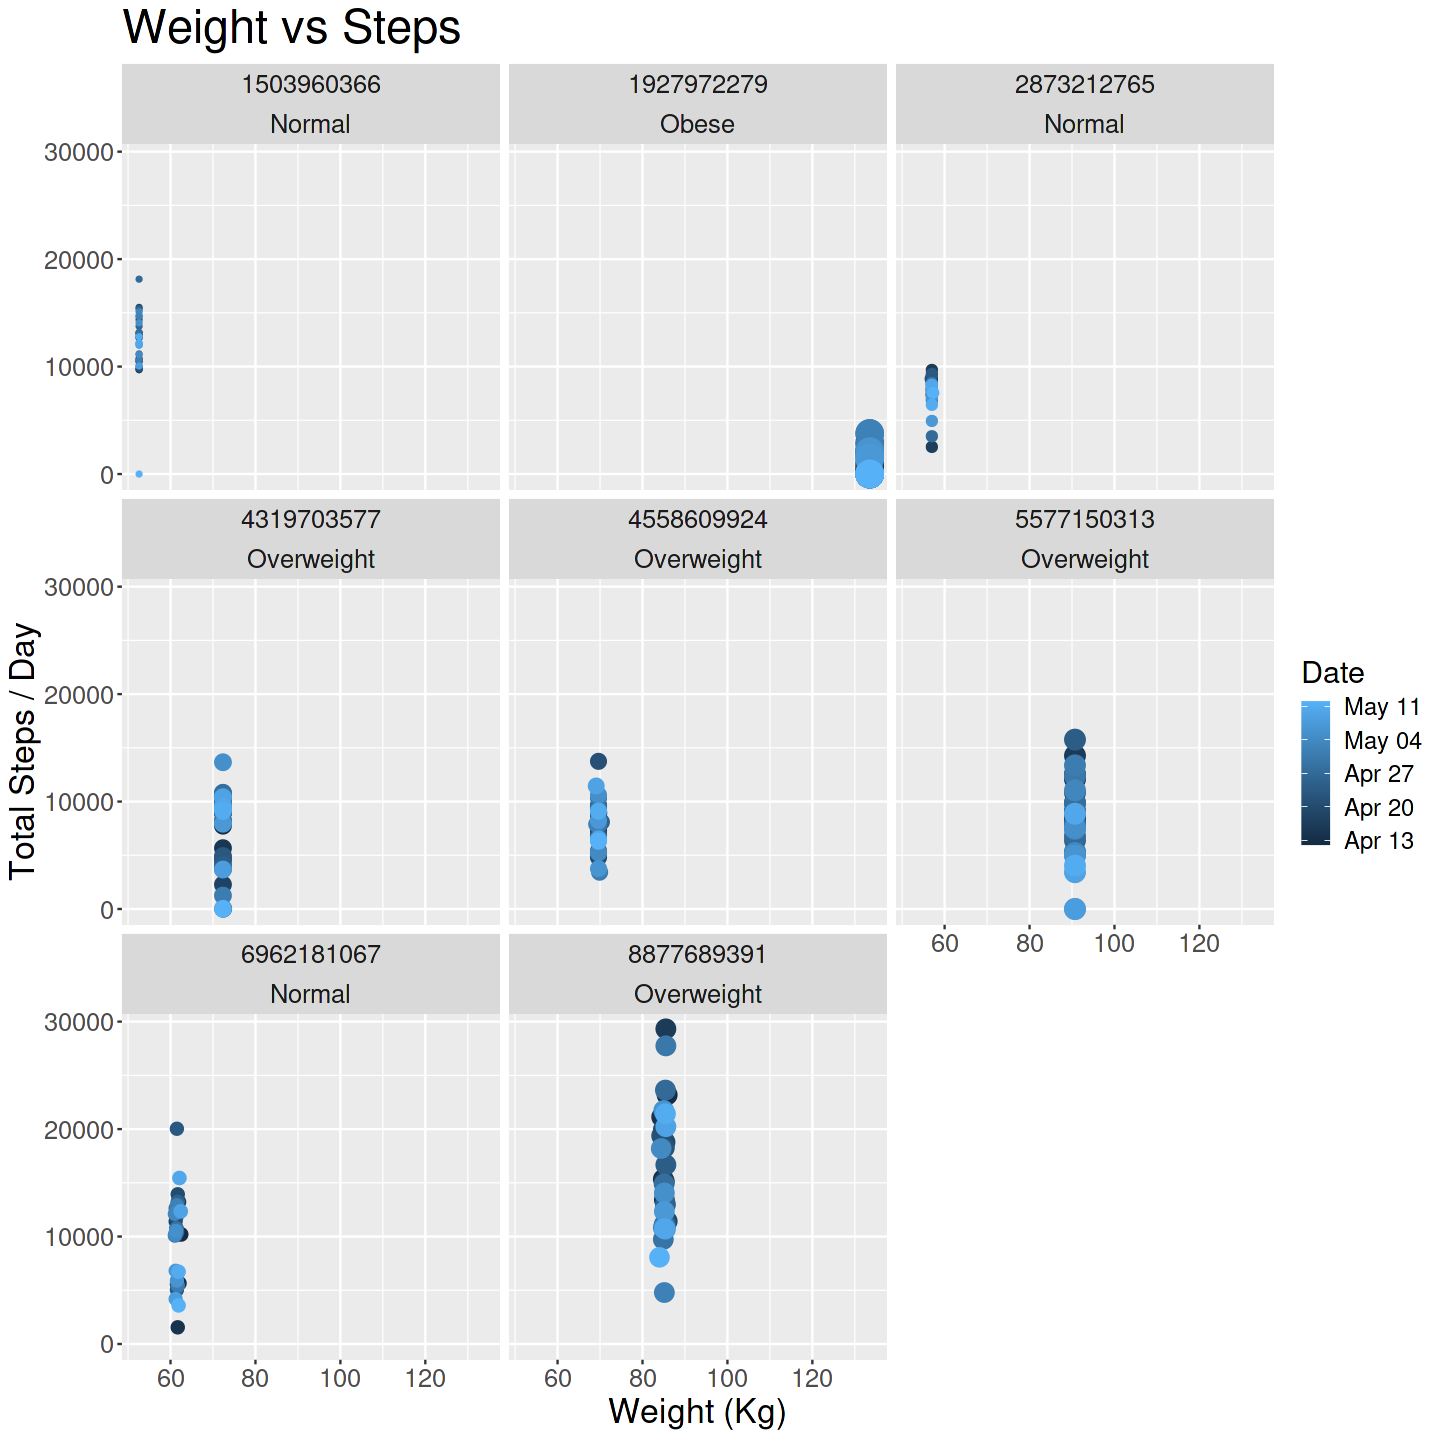

In [26]:
ggplot(complete_aw, aes(weightkg, totalsteps))+
    labs(title = "Weight vs Steps",
       y = "Total Steps / Day",
       x = "Weight (Kg)")+
    theme(axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 15), plot.title = element_text(size = 28), 
          axis.title = element_text(size = 20), legend.text = element_text(size = 14), legend.title = element_text(size = 18),
          strip.text = element_text(size=15))+
    geom_point(aes(size = weightkg, color = date))+
    facet_wrap(~id + bmiclass)+
    guides(size = "none")+labs(color = "Date")+
    scale_size_continuous(range = c(1, 7))

The final result with imputing the mean value of weight and bmi to each user's missing value is as above. All 8 users are actually highly active. Along with the 4th visualization (BMI donut chart), we can get the idea of the majority's behaviour on taking steps based on their BMI class or weight. For instance we can see user 1927972279 with obesity took less than 10,000 steps each day and their intensity is decreasing day by day (dark points gradualy turn to blue from top to bottom). This information is useful to personalize fitness program for users to keep them active and get safer BMI.

# Findings

Some key findings:
* Total steps and heart rate doesnt have much correlation, but they still move at the same direction widespreadly
* More total steps and heart rate data pair is needed for better conclusion
* Total steps and calories are highly positive-correlated
* Some users consistently take steps after they have burnt a lot of calories
* Some users reduce their steps once they have reached some point of calories burnt
* Users with light intensity of activity sleep with a descent duration
* Users with moderate intensity of activity are more likely to sleep with the best duration, but some may sleep for too long
* Users with high intensity of activity sleep with various duration, from too short to descent
* Overweight users made up 50% of the entire weight data
* Overweight users are highly and constanly active 

# Sugestion

Suggestion based on analyzed data:
* Conduct more survey on heart rate to gain more insight about heart rate relation with other data
* Conduct more survey on weight to gain more insight about weight relation with other data
* Add feature to tell users whether they are doing enough activity to get the best sleep based on their age
* Use steps, calories, BMI, and date data to add reminder feature
* Personalize exercise plan and add BMI goal for users
* Focus advertising on overweight people since they are potential buyer

# Credits

This notebook was made by the end of my [**Google Data Analytics Specialization**](https://www.coursera.org/professional-certificates/google-data-analytics) certification on Coursera. Some of my steps and codes are highly inspired by the work of [**christine1cy**](https://www.kaggle.com/christine1cy/bellabeat-case-study) and [**miguelfzzz**](https://www.kaggle.com/miguelfzzz/bellabeat-data-analysis-discovering-trends) on the same datasets. Let me know in the comment if you want to talk anything about this notebook. An upvote would be really appreciated. Thank you for checking!